# Introduction
"""
### This notebook explores a dataset containing information about movies, including their genres, budgets, revenues, release dates, and popularity.
"""



# Questions
"""
1. What are the top 10 movie genres based on frequency?
2. How are movie budgets distributed?
3. How are movie revenues distributed?
4. Is there a relationship between movie budgets and revenues?
5. How has the average movie popularity changed over the years?
6. How has the average movie runtime changed over the years?

"""


In [3]:
# Data Wrangling
import pandas as pd

# read csv file
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')



# remove nan values
df.dropna(inplace=True)

# remove duplicate values
df.drop_duplicates(inplace=True)

# convert release_date dtype to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Splitting cast and genres columns
df['cast'] = df['cast'].apply(lambda x: x.split('|'))
df['genres'] = df['genres'].apply(lambda x: x.split('|'))
df['genres'] = df['genres'].astype(str)

# print first 5 raws
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"['Action', 'Adventure', 'Science Fiction', 'Th...",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,"['Action', 'Adventure', 'Science Fiction', 'Th...",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,"['Adventure', 'Science Fiction', 'Thriller']",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,"['Action', 'Adventure', 'Science Fiction', 'Fa...",Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,"['Action', 'Crime', 'Thriller']",Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot and show
def plot_txy(title, x_label, y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()



# Analysis 1: Distribution of Movie Genres
>-
Reasoning: Understanding the frequency of different movie genres can help identify popular genres in the dataset, providing insights into audience preferences.



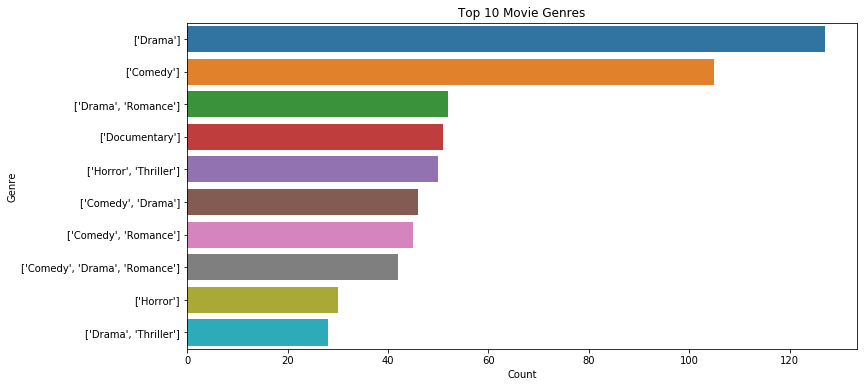

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(y='genres', data=df, order=df['genres'].value_counts().index[:10])
plot_txy('Top 10 Movie Genres', 'Count', 'Genre')


# Analysis 2: Distribution of Movie Budgets

>-Reasoning: Examining the distribution of movie budgets can provide insights into the financial landscape of the movie industry.



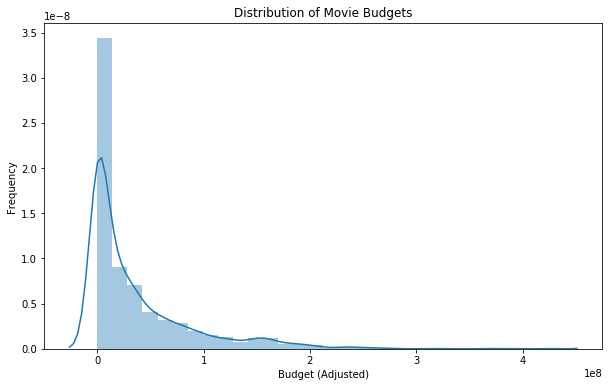

In [6]:
plt.figure(figsize=(10, 6))
sns.distplot(df['budget_adj'], bins=30, kde=True)
plot_txy('Distribution of Movie Budgets', 'Budget (Adjusted)', 'Frequency')



# Analysis 3: Distribution of Movie Revenues
>-
Reasoning: Similar to budgets, analyzing the distribution of movie revenues helps understand the financial performance of movies.



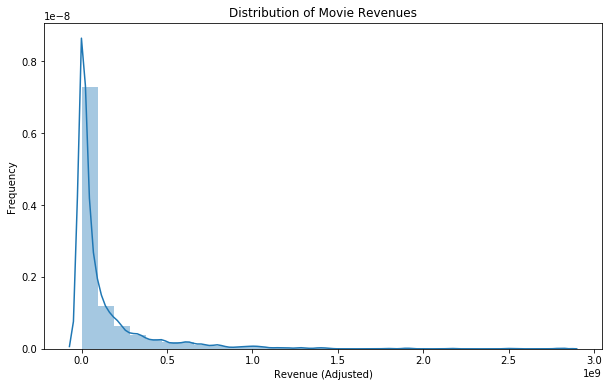

In [7]:
plt.figure(figsize=(10, 6))
sns.distplot(df['revenue_adj'], bins=30, kde=True)
plot_txy('Distribution of Movie Revenues', 'Revenue (Adjusted)', 'Frequency')



# Analysis 4: Relationship between Budget and Revenue
>-
Reasoning: Investigating the relationship between movie budgets and revenues can reveal insights into the profitability of movies.



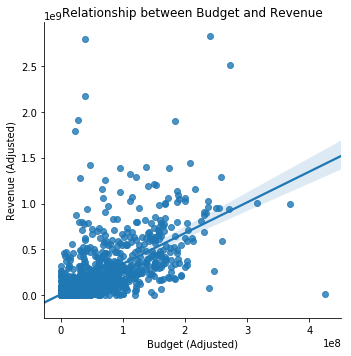

In [8]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='budget_adj', y='revenue_adj', data=df)
plot_txy('Relationship between Budget and Revenue', 'Budget (Adjusted)', 'Revenue (Adjusted)')



# Analysis 5: Average Movie Popularity by Release Year
>-
Reasoning: Analyzing the average popularity of movies over the years provides insights into changing audience preferences and trends.



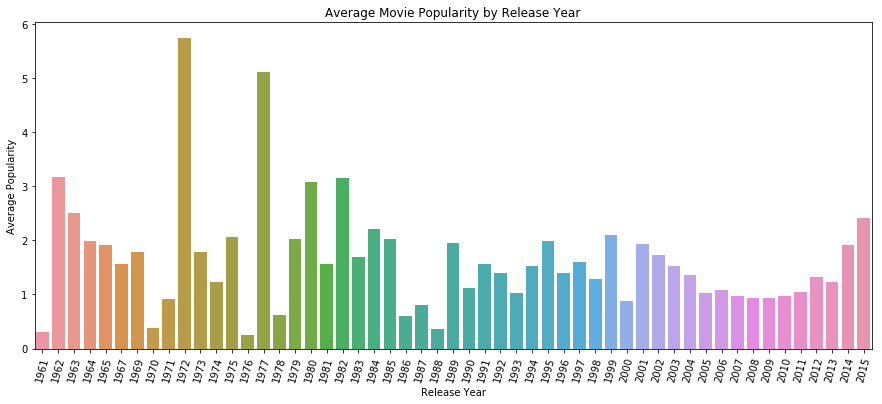

In [9]:
avg_popularity = df.groupby('release_year')['popularity'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x='release_year', y='popularity', data=avg_popularity)
plt.xticks(rotation=75)
plot_txy('Average Movie Popularity by Release Year', 'Release Year', 'Average Popularity')



# Analysis 6: Average Movie Runtime by Release Year
>-
Reasoning: Examining the average runtime of movies over the years helps understand potential shifts in storytelling or audience expectations.


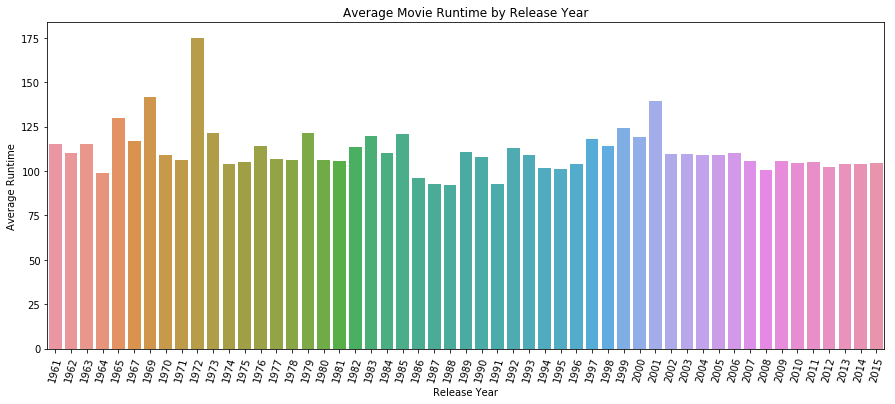

In [10]:
avg_runtime = df.groupby('release_year')['runtime'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x='release_year', y='runtime', data=avg_runtime)
plt.xticks(rotation=75)
plot_txy('Average Movie Runtime by Release Year', 'Release Year', 'Average Runtime')


# Conclusions
>
Conclusions:
- The most popular movie genres based on the dataset are identified.
- The distribution of movie budgets and revenues is examined, showing the overall financial landscape of movies.
- A relationship between movie budgets and revenues is explored through a scatter plot.
- Average movie popularity over the years is analyzed.
- Average movie runtime over the years is calculated and visualized.




# Limitations
>
Limitations:
- The analysis is based on the provided dataset, which may not be fully representative of the entire movie industry.
- The dataset might contain outliers or inaccuracies that could influence the analysis results.




# Overall, this notebook provides insights into various aspects of the movie industry, but it's essential to consider its limitations and potential biases when interpreting the findings.

In [11]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0